In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD GBP/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

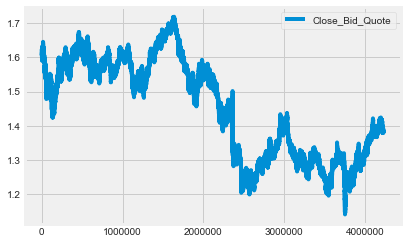

In [3]:
plt.figure(figsize=(20,5))
data.plot()

In [4]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 17:01:00          1.61110
1        2010-01-03 17:02:00          1.61060
2        2010-01-03 17:03:00          1.61080
3        2010-01-03 17:05:00          1.61070
4        2010-01-03 17:07:00          1.61080
...                      ...              ...
4226332  2021-06-30 23:54:00          1.38143
4226333  2021-06-30 23:55:00          1.38145
4226334  2021-06-30 23:56:00          1.38164
4226335  2021-06-30 23:57:00          1.38182
4226336  2021-06-30 23:58:00          1.38172

[4226337 rows x 2 columns]>

In [5]:
data['Timestamp'].min()

'2010-01-03 17:01:00'

In [6]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [7]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [8]:
data = data.resample("H").max()

In [9]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

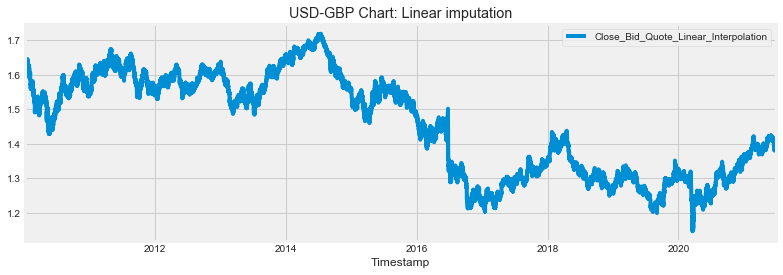

In [10]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-GBP Chart: Linear imputation')
plt.show(block=False)

In [11]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [12]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [13]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03 17:00:00,1.6132
2010-01-03 18:00:00,1.6147
2010-01-03 19:00:00,1.6140
2010-01-03 20:00:00,1.6118
2010-01-03 21:00:00,1.6116


In [14]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [15]:
len(test)

20143

In [16]:
len(train)

80568

In [17]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

80569

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.81576924],
       [0.81838988],
       [0.81716692],
       ...,
       [0.41175443],
       [0.4113526 ],
       [0.41152731]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [20]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.81576924, 0.81838988, 0.81716692, 0.81332332, 0.8129739 ,
       0.81192564, 0.81000384, 0.80982913, 0.81087739, 0.81087739,
       0.81961284, 0.82817359, 0.83393899, 0.83184248, 0.83114365,
       0.82345645, 0.82590237, 0.82555295, 0.81507041, 0.81437157,
       0.81524512, 0.81367273, 0.81070268, 0.80982913, 0.80947972,
       0.81210035, 0.81629337, 0.81052797, 0.80930501, 0.80947972,
       0.81244977, 0.81576924, 0.8187393 , 0.81908872, 0.81017855,
       0.80598553, 0.8014431 , 0.79707537, 0.80161781, 0.80056955,
       0.80074426, 0.80388902, 0.80074426, 0.79445473, 0.79096055,
       0.79253293, 0.79340648, 0.79323177, 0.79235822, 0.79096055,
       0.79078584, 0.79340648, 0.79165939, 0.79026171, 0.79008701,
       0.78938817, 0.78956288, 0.79655124, 0.8033649 , 0.80249135])]
[0.7962018239631017]

[array([0.81576924, 0.81838988, 0.81716692, 0.81332332, 0.8129739 ,
       0.81192564, 0.81000384, 0.80982913, 0.81087739, 0.81087739,
       0.81961284, 0.82817359, 0.833

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
2516/2516 [==============================] - 283s 109ms/step - loss: 0.0037
Epoch 2/10
2516/2516 [==============================] - 209s 83ms/step - loss: 4.0996e-05
Epoch 3/10
2516/2516 [==============================] - 198s 79ms/step - loss: 2.9781e-05
Epoch 4/10
2516/2516 [==============================] - 198s 79ms/step - loss: 2.5919e-05
Epoch 5/10
2516/2516 [==============================] - 198s 79ms/step - loss: 1.6116e-05
Epoch 6/10
2516/2516 [==============================] - 200s 79ms/step - loss: 1.1591e-05
Epoch 7/10
2516/2516 [==============================] - 200s 79ms/step - loss: 1.0624e-05
Epoch 8/10
2516/2516 [==============================] - 198s 79ms/step - loss: 9.1196e-06
Epoch 9/10
2516/2516 [==============================] - 211s 84ms/step - loss: 9.8968e-06
Epoch 10/10
2516/2516 [==============================] - 204s 81ms/step - loss: 9.1430e-060s - loss: 9.1430e-0


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.0011739794583811235

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


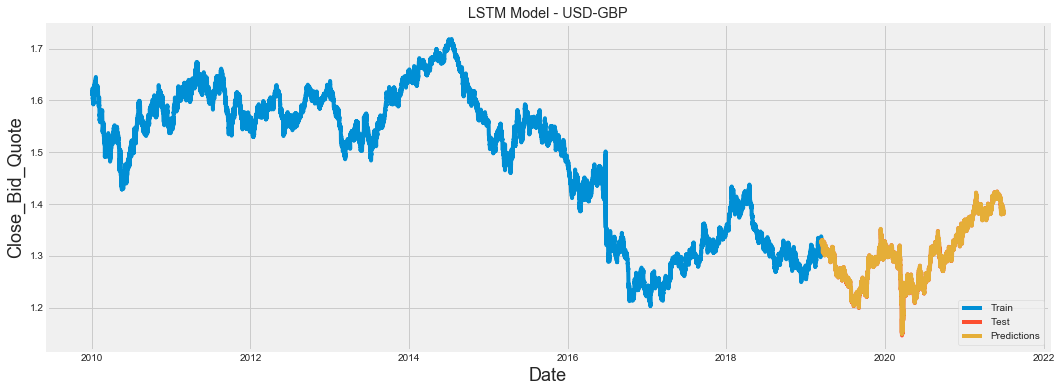

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-GBP')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-14 18:00:00,1.32582,1.326401
2019-03-14 19:00:00,1.32580,1.325689
2019-03-14 20:00:00,1.32420,1.325702
2019-03-14 21:00:00,1.32525,1.324058
2019-03-14 22:00:00,1.32556,1.325228
...,...,...
2021-06-30 19:00:00,1.38330,1.382953
2021-06-30 20:00:00,1.38290,1.383123
2021-06-30 21:00:00,1.38195,1.382690
